<a href="https://colab.research.google.com/github/LeeSeungwon89/Lecture-and-self-study/blob/master/3-2%20%EC%84%A0%ED%98%95%20%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 회귀

## k-최근접 이웃의 한계

In [ ]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [ ]:
# 2차원 배열로 변환해야 함.
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

print(np.shape(train_input))

print(train_input, test_input)

(42, 1)
[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]] [[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)

knr.fit(train_input, train_target)

print(knr.predict([[50]]))
print(knr.predict([[100]])) # 길이가 50, 100이면 무게를 1033으로 예측함.
# 그러나 실제 농어의 무게는 1033이 아님. 훨씬 많이 나감. 게다가 같지도 않음.

[1033.33333333]
[1033.33333333]


[[6. 7. 7.]] [[34  8 14]]
[[56. 57. 57.]] [[34  8 14]]
[[[44.]
  [43.]
  [43.]]]
[[[44.]
  [43.]
  [43.]]]


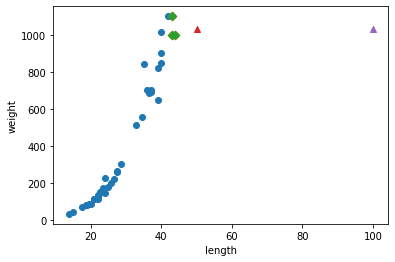

In [ ]:
 # 그려서 확인함.
import matplotlib.pyplot as plt

 # 길이가 50, 100인 농어의 이웃까지의 거리, 이웃 샘플의 인덱스를 추출함.
distances_50, indexes_50 = knr.kneighbors([[50]])
distances_100, indexes_100 = knr.kneighbors([[100]])

print(distances_50, indexes_50)
print(distances_100, indexes_100) # 이웃까지의 거리는 다르나 이웃 샘플의 인덱스는 같음.

print(train_input[indexes_50])
print(train_input[indexes_100]) # 34, 8, 14번째(인덱스) 데이터를 반환함.

plt.scatter(train_input, train_target) # 파란색 원점으로 표시함.

plt.scatter(train_input[indexes_50], train_target[indexes_50], marker = 'D') # 초록색 마름모로 표시함. 이웃 샘플의 인덱스가 같음.
plt.scatter(train_input[indexes_100], train_target[indexes_100], marker = 'D') # 초록색 마름모로 표시함. 이웃 샘플의 인덱스가 같음.

plt.scatter(50, 1033, marker = '^') # 세모로 표시함.
plt.scatter(100, 1033, marker = '^') 

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [ ]:
print(train_target[indexes_100])

print(np.mean(train_target[indexes_100])) # 샘플 3개의 무게를 평균한 값이 예측값임.

[[1000. 1000. 1100.]]
1033.3333333333333


## 선형 회귀

- 대표적인 회귀 알고리즘
- $y = ax + b$

 무게 = $a$ * 길이 + $b$

 $a$ = 기울기 (계수(coefficient) or 가중치(weight)로 부름.)

 $b$ = 절편

 $a$와 $b$는 LinearRegression 클래스가 찾음.

  가중치가 기울기와 절편 모두를 의미하는 경우가 많음.

In [ ]:
# 이 문제를 해결하기 위한 알고리즘은 선형 회귀임.
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# 선형 회귀 모델로 훈련함.
lr.fit(train_input, train_target)

print(lr.predict([[50]]))

[1241.83860323]


In [ ]:
# LinearRegression 클래스가 찾은 a(계수)는 lr객체의 'coef_' 속성에 저장됨. 배열의 크기는 특성의 개수와 같음.
# LinearRegression 클래스가 찾은 b(절편)는 lr객체의 'intercept_' 속성에 저장됨.
# 머신러닝이 찾은 이 값들을 '모델 파라미터(model parameter)' 라고 함.
# 머신러닝 알고리즘의 훈련 과정은 최적의 모델 파라미터를 찾는 것임. 이를 '모델 기반 학습' 이라고 함.
# K-최근접 이웃에는 모델 파라미터가 없음. 훈련 세트를 저장하는 것이 전부임. 이를 '사례 기반 학습' 이라고 함.
print(lr.coef_, lr.intercept_) # 열(특성=피처)이 2개이므로 계수가 2개임. 절편은 1개를 만듦.

[39.01714496] -709.0186449535477


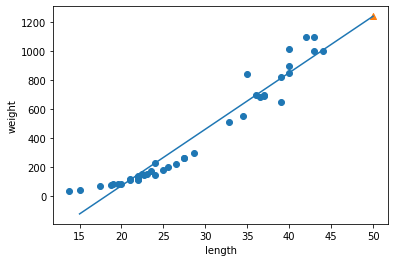

0.9398463339976039
0.8247503123313558


In [ ]:
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프를 그림.
plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])

# 50cm 농어 데이터를 그림.
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show() # 그래프 왼쪽 아래가 이상함.

# R^2 점수를 확인함.
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
# 전체적으로 과소적합됨.
# 결론은 직선 형태로는 제대로 된 예측을 할 수 없음.

## 다항 회귀

- $y = ax^2 + bx + c$

 무게 = $a$ * 길이$^2$ + $b$ * 길이 + $c$

 $a, b$ = 기울기 (계수(coefficient) or 가중치(weight)로 부름.)

 $c$ = 절편

 가중치가 기울기와 절편 모두를 의미하는 경우가 많음.

In [ ]:
# 2차 방정식 그래프를 그려서 곡선 형태로 잡아줘야 함.
# 2차 방정식 그래프를 그리려면 길이를 제곱한 항을 column_stack() 함수를 사용하여 훈련 세트에 추가해야 함.
train_poly = np. column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape)
print(train_poly)

print(test_poly.shape)
print(test_poly)
# 이렇게 제곱 항을 추가했지만 타깃값은 그대로 사용하는 형태임. 목표 값은 어떤 그래프를 훈련하든 바꿀 필요가 없음.

(42, 2)
[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]
 [ 625.     25.  ]
 [1600.     40.  ]
 [1521.     39.  ]
 [1849.     43.  ]
 [ 484.     22.  ]
 [ 400.     20.  ]
 [ 484.     22.  ]
 [ 576.     24.  ]
 [ 756.25   27.5 ]
 [1849.     43.  ]
 [1600.     40.  ]
 [ 576.     24.  ]
 [ 441.     21.  ]
 [ 756.25   27.5 ]
 [1600.     40.  ]
 [1075.84   32.8 ]
 [ 702.25   26.5 ]
 [1332.25   36.5 ]
 [ 187.69   13.7 ]
 [ 515.29   22.7 ]
 [ 225.     15.  ]
 [1369.     37.  ]
 [1225.     35.  ]
 [ 823.69   28.7 ]
 [ 552.25   23.5 ]
 [1521.     39.  ]
 [ 441.     21.  ]
 [ 529.     23.  ]
 [ 484.     22.  ]
 [1936.     44.  ]
 [ 506.25   22.5 ]
 [ 361.     19.  ]
 [1369.     37.  ]
 [ 484.     22.  ]
 [ 655.36   25.6 ]
 [1764.     42.  ]
 [1190.25   34.5 ]]
(14, 2)
[[  70.56    8.4 ]
 [ 324.     18.  ]
 [ 756.25   27.5 ]
 [ 453.69   21.3 ]
 [ 506.25   22.5 ]
 [1600.     40.  ]
 [ 900.     30.  ]
 [ 605.16   24.6 ]
 [1521.     39.  ]
 [ 441.     21

In [ ]:
# 테스트 할 때는 이 모델에 길이의 제곱과 원래 길이를 함께 넣어줘야 함.
lr = LinearRegression()

lr.fit(train_poly, train_target)

print(lr.predict([[50 ** 2, 50]]))
# 약 1574라는 값을 예측함.

[1573.98423528]


In [ ]:
print(lr.coef_, lr.intercept_) # 열(특성=피처)이 2개이므로 계수가 2개임. 절편은 1개를 만듦.

[  1.01433211 -21.55792498] 116.05021078278276


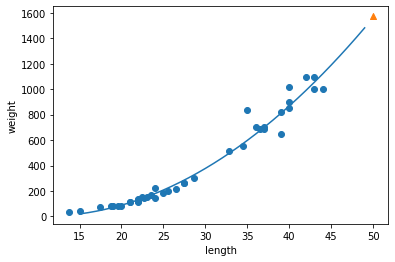

In [ ]:
# 구간별 직선을 그리고자 15에서 49까지 정수 배열을 만듦.
point = np.arange(15, 50)

plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그림.
plt.plot(point, 1.01 * point ** 2 - 21.6 * point + 116.05)

plt.scatter(50, 1574, marker = '^')

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [ ]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
# 아직 과소적합임.

0.9706807451768623
0.9775935108325122
